In [49]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense, Conv1D, MaxPool1D, Dropout, LSTM
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
maxlen=500
vector_space = 32
word_len = 5000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=word_len)

In [3]:
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.45, random_state=42)

In [4]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test  = tf.keras.preprocessing.sequence.pad_sequences(X_test,  maxlen=maxlen)

In [50]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)



model = Sequential()
model.add(Embedding(word_len, vector_space, input_length=maxlen))
# model.add(Conv1D(filters=32, kernel_size=3, activation="tanh", kernel_regularizer="l2"))
# model.add(MaxPool1D(pool_size=2))
# model.add(Flatten())
model.add(LSTM(vector_space, return_sequences=True))
model.add(LSTM(vector_space, return_sequences=True))
model.add(LSTM(vector_space))
model.add(Dense(128, activation="tanh", kernel_regularizer="l2"))
model.add(Dropout(.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics="acc", optimizer=adam)


In [51]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 500, 32)           8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 32)           8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [52]:
res = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=64)

Epoch 1/8
430/430 [==============================] - 576s 1s/step - loss: 0.9690 - acc: 0.6444 - val_loss: 0.6639 - val_acc: 0.8312
Epoch 2/8
430/430 [==============================] - 565s 1s/step - loss: 0.5350 - acc: 0.8641 - val_loss: 0.4637 - val_acc: 0.8704
Epoch 3/8
430/430 [==============================] - 566s 1s/step - loss: 0.3772 - acc: 0.8945 - val_loss: 0.3723 - val_acc: 0.8800
Epoch 4/8
430/430 [==============================] - 565s 1s/step - loss: 0.2941 - acc: 0.9097 - val_loss: 0.3407 - val_acc: 0.8773
Epoch 5/8
430/430 [==============================] - 562s 1s/step - loss: 0.2508 - acc: 0.9171 - val_loss: 0.3353 - val_acc: 0.8700
Epoch 6/8
430/430 [==============================] - 561s 1s/step - loss: 0.2241 - acc: 0.9238 - val_loss: 0.3345 - val_acc: 0.8808
Epoch 7/8
430/430 [==============================] - 559s 1s/step - loss: 0.2036 - acc: 0.9308 - val_loss: 0.3360 - val_acc: 0.8679
Epoch 8/8
430/430 [==============================] - 867s 2s/step - loss: 0.

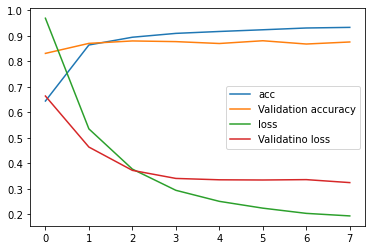

In [53]:
plt.plot(res.history["acc"], label="acc")
plt.plot(res.history["val_acc"], label="Validation accuracy")
plt.plot(res.history["loss"], label="loss")
plt.plot(res.history["val_loss"], label="Validatino loss")
plt.legend()